In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/UCI_Credit_Card_Rename.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
X = df.loc[:,'LIMIT_BAL':'PAY_AMT6']
y = df['def_pay']

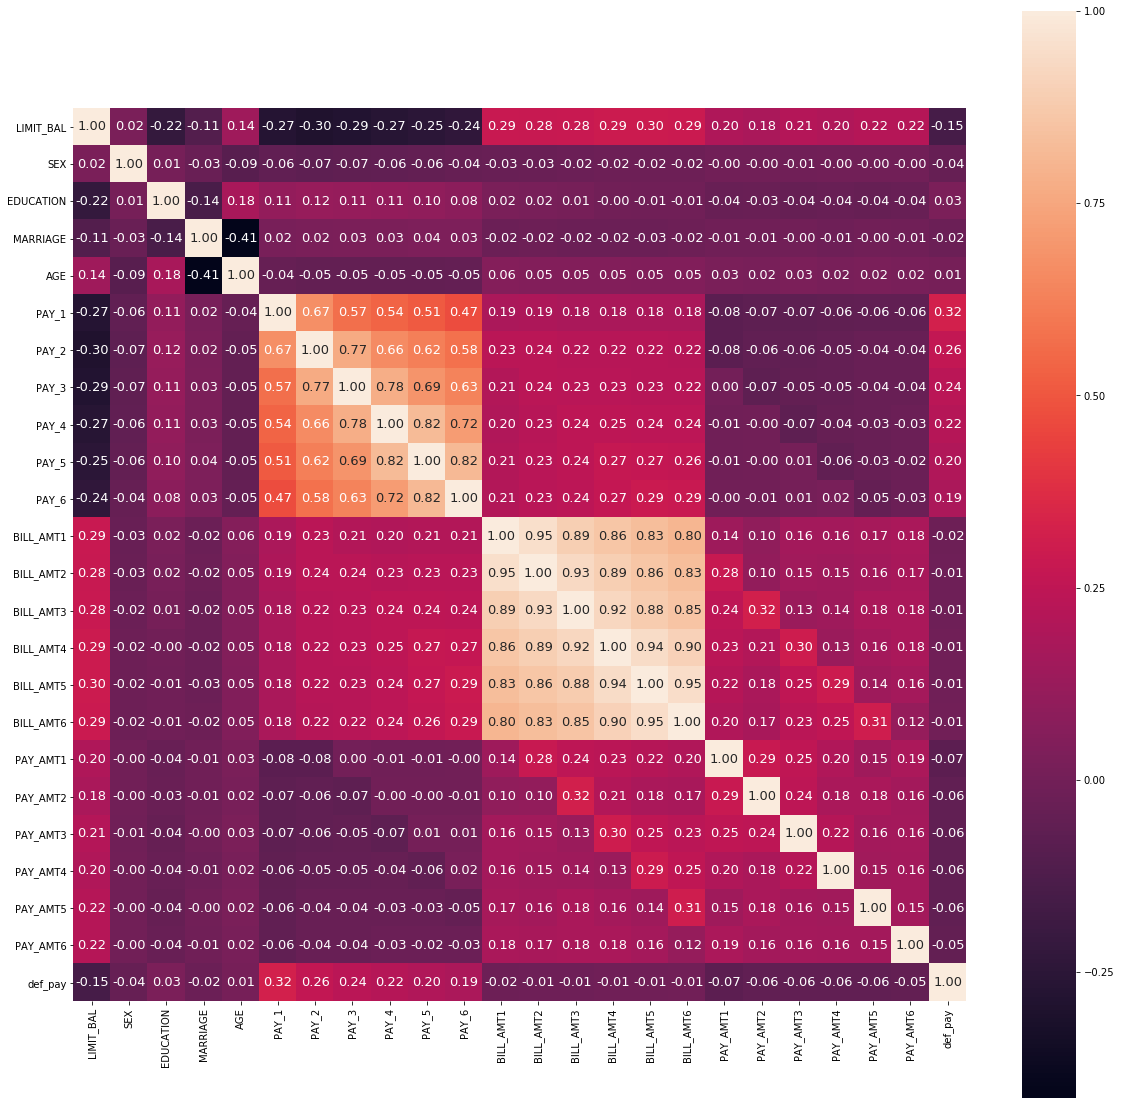

In [4]:
corr = df.corr()
corr = (corr)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar = True, square = True, annot = True,
           fmt='.2f', annot_kws={'size': 13},
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
OHE = OneHotEncoder(sparse=False, categories='auto')
sex = OHE.fit_transform(X[['SEX']])
marriage = OHE.fit_transform(X[['MARRIAGE']])
education = OHE.fit_transform(X[['EDUCATION']])
cat_data = np.hstack((sex, marriage, education))

In [7]:
num_data = X.drop(['SEX', 'MARRIAGE', 'EDUCATION'], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler().fit(num_data)
std_num_data = scaler.transform(num_data)

c:\users\kangy\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\kangy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [10]:
X_final = np.hstack((cat_data, std_num_data))

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
selector = SelectKBest(k=10)
fit =  selector.fit(X_final, y)
print(fit.scores_)

[4.79788543e+01 4.79788543e+01 5.19449507e+00 2.66176470e+01
 2.81509194e+01 2.86255406e+00 3.97849278e+00 7.92396241e+01
 3.99464687e+01 3.15300070e+01 1.93619383e+01 4.04483327e+01
 1.22747289e+00 7.24068539e+02 5.78855582e+00 3.53771497e+03
 2.23916914e+03 1.75746644e+03 1.47684597e+03 1.30459118e+03
 1.08540249e+03 1.15805315e+01 6.04423789e+00 5.94438771e+00
 3.09474518e+00 1.37108740e+00 8.65820292e-01 1.60403810e+02
 1.03291524e+02 9.52180109e+01 9.71880005e+01 9.14298008e+01
 8.50890453e+01]


In [13]:
features = fit.transform(X_final)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [16]:
SVM = SVC(kernel='linear')

In [17]:
predictor = SVM.fit(X_train,y_train)
y_predict_test = predictor.predict(X_test)
y_predict_train = predictor.predict(X_train)

In [18]:
print(accuracy_score(y_train, y_predict_train))
print(accuracy_score(y_test, y_predict_test))

0.8093703703703704
0.8106666666666666


In [23]:
SVM_poly = SVC(kernel='poly', degree=3)
predictor_poly = SVM_poly.fit(X_train, y_train)
y_predict_test_poly = predictor_poly.predict(X_test)
y_predict_train_poly = predictor_poly.predict(X_train)

c:\users\kangy\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
print(accuracy_score(y_train, y_predict_train_poly))
print(accuracy_score(y_test, y_predict_test_poly))

0.8024074074074075
0.7946666666666666
